In [88]:
import os
import pandas as pd
pd.set_option('display.max_columns', None)
from google.cloud import bigquery
import numpy as np

df_daily = pd.read_gbq("select * from `intense-arbor-186802`.sample_data.top_3_prods",
                 project_id="intense-arbor-186802")

In [89]:
df_daily["resource_type"] = np.where(df_daily["resource_type"].str.contains("VCPU"),"VCPU",
         np.where(df_daily["resource_type"].str.contains("Fee"), "Licensing Fees",
                  np.where(df_daily["resource_type"].str.contains("GPU"), "GPU",
                           np.where(df_daily["resource_type"].str.contains("CPU"), "CPU",
                                    np.where(df_daily["resource_type"].str.contains("Egress"), "Egress",
                                             np.where(df_daily["resource_type"].str.contains("PD"), "PD", 
                                                      np.where(df_daily["resource_type"].str.contains("Load Balancing"),"Load Balancing",
                                                              np.where(df_daily["resource_type"].str.contains("Custom instance"),"Custom Instance",
                                                                       np.where(df_daily["resource_type"].str.contains(" Regional Storage"),"Regional Storage",
                                                                               np.where(df_daily["resource_type"].str.contains("Multi-Regional Storage"),"Multi-Regional Storage",
                                                                                       np.where(df_daily["resource_type"].str.contains("Static Ip"), "Static Ip Charge",
                                                                                               df_daily["resource_type"]
                                                                                               )
                                                                                       )
                                                                               )
                                                                      )
                                                              )
                                                    )
                                               )
                                      )
                            )
                    )
                                    )
                                             
                      


In [90]:
df_daily["resource_type"].unique()
df_daily = df_daily[(df_daily["resource_type"] != "Custom Instance")]

In [91]:
def plot_prod(product, legend=True):
    df_daily_prod = df_daily[df_daily["product"] == product]
    df_daily_prod = df_daily_prod[["start_time","unit","cost","resource_type"]]
    df_daily_prod_pivot = pd.pivot_table(df_daily_prod, values="cost", index="start_time", columns=["unit","resource_type"])

    for col in df_daily_prod_pivot.columns:
        df_daily_prod_pivot[col] = np.log(df_daily_prod_pivot[col])

    df_daily_prod_pivot.plot(title=product,figsize=(15,10),legend = legend)

C:\Users\jstep\Anaconda3\envs\MonotonicWOE\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\jstep\Anaconda3\envs\MonotonicWOE\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


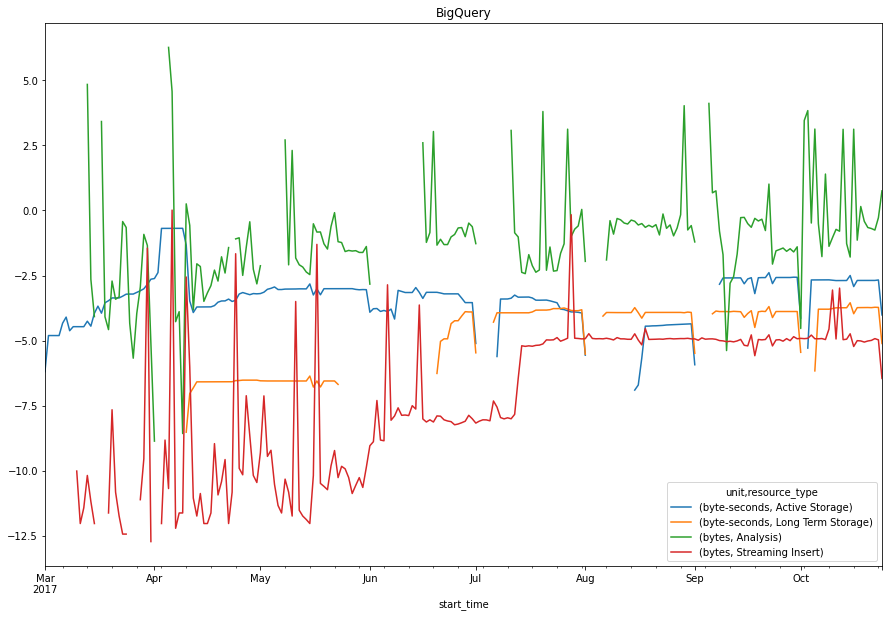

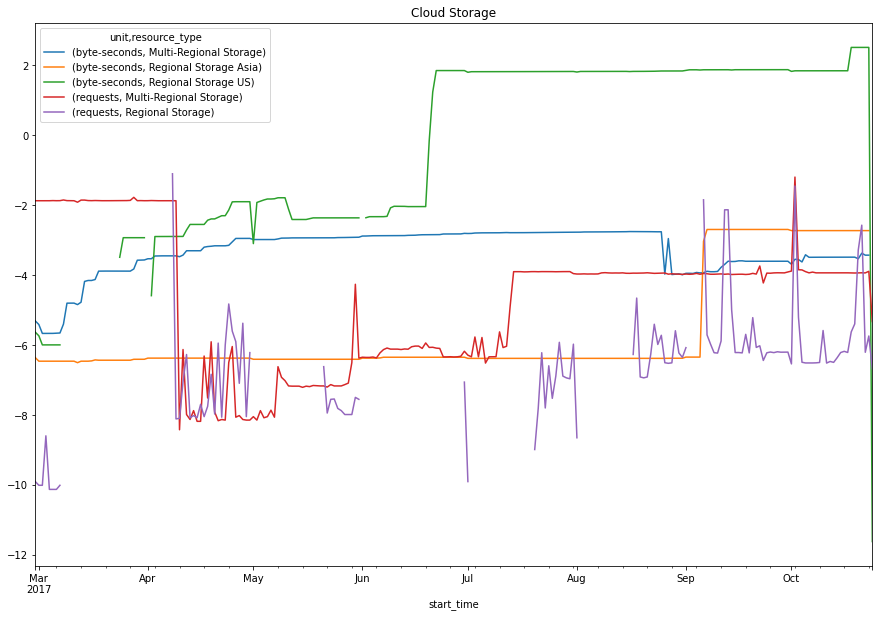

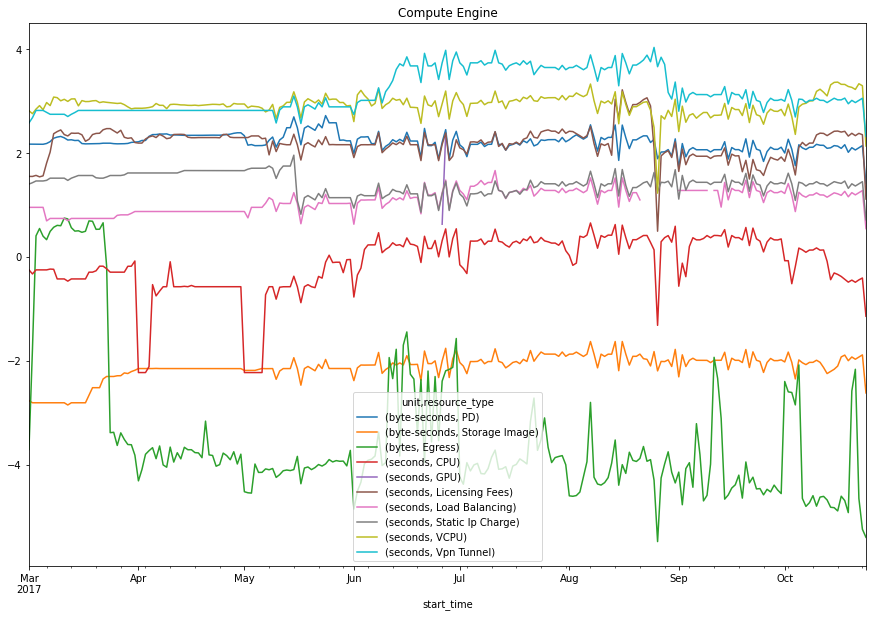

In [92]:
plot_prod("BigQuery")
plot_prod("Cloud Storage")
plot_prod("Compute Engine",legend=True)

In [21]:
df_daily_prod = df_daily[df_daily["product"] == "Compute Engine"]

In [38]:
pd.set_option('display.max_rows', None)
pd.DataFrame(df_daily_prod.groupby(["resource_type","unit"]).size()).sort_values(by=0,ascending=False)

,,0
resource_type,unit,
Vpn Tunnel,seconds,238
Standard Intel N1 4 VCPU running in APAC,seconds,238
SSD backed PD Capacity in Japan,byte-seconds,238
Network Internet Egress from Americas to EMEA,bytes,238
Network Internet Egress from Americas to China,bytes,238
Network Internet Egress from Americas to Americas,bytes,238
Network Inter Zone Egress,bytes,238
Network Inter Region Egress from Americas to Americas,bytes,238
Small instance with 1 VCPU running in APAC,seconds,238
